## Web Scrapping 
Acquring data from web and ultimately converting it in the form of a csv file.

### Steps:
- Import beautiful soup
- Make a GET request to fetch page data
- Parse HTML
- Filter relevant parts

In [4]:
# First we import a request library 
from urllib.request import urlopen

In [5]:
bleach_url = "https://en.wikipedia.org/wiki/Bleach_(TV_series)"

In [6]:
bleach_data = urlopen(bleach_url) # Making a GET request, and receiving the HTTP response in bleach_data

In [7]:
print(type(bleach_data)) 

<class 'http.client.HTTPResponse'>


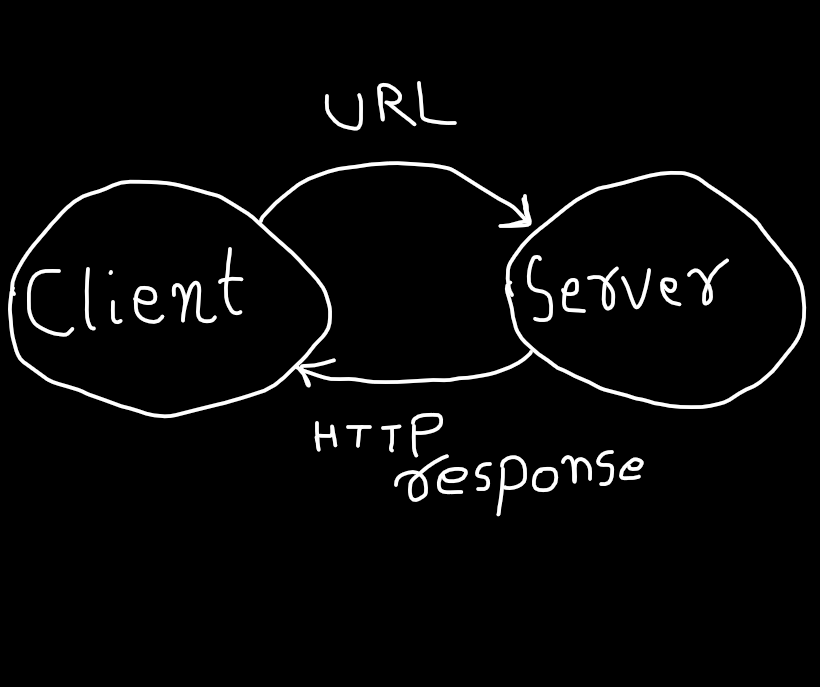

- Browser makes some requests, status tells that whether the response was ok or not (inspect).
- The code (in elements of inspect) having bits of css, html, js comes to us via GET. 
- Data could then be obtained by parsing the HTML

In [8]:
# reading HTML of the entire wikipedia page of bleach
bleach_html = bleach_data.read()

In [9]:
print(bleach_html)

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Bleach (TV series) - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"YDfKn80TgAsgMIJHowZkgQAAAAc","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Bleach_(TV_series)","wgTitle":"Bleach (TV series)","wgCurRevisionId":1008870170,"wgRevisionId":1008870170,"wgArticleId":1397721,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 uses Japanese-language script (ja)","CS1 Japanese-language sources (ja)","CS1 maint: others","Webarchive template wayback links","Use mdy dates from N

Now that we have fetched HTML code of that page, we can close the connection that we had establised 

In [10]:
bleach_data.close()

### Parsing data

In [1]:
from bs4 import BeautifulSoup as soup # BeautifulSoup is a class

We need to mention the type of data that we're wanting to parse, 
i.e whether it is json, html,.. 

In [11]:
bleach_soup = soup(bleach_html,'html.parser') 

In [13]:
print(bleach_soup) # Also include java script

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Bleach (TV series) - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"YDfKn80TgAsgMIJHowZkgQAAAAc","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Bleach_(TV_series)","wgTitle":"Bleach (TV series)","wgCurRevisionId":1008870170,"wgRevisionId":1008870170,"wgArticleId":1397721,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 uses Japanese-language script (ja)","CS1 Japanese-language sources (ja)","CS1 maint: others","Webarchive template wayback links","Use mdy dates from Novembe

This object helps in extracting specific elements of HTML.

In [28]:
# For instance
print(bleach_soup.h1) # Gives out the first heading of that page 

# To get all such headings
all_headings = bleach_soup.findAll('h1',{})
print(all_headings)
# Returns all the headings having h1 tag

<h1 class="firstHeading" id="firstHeading"><i>Bleach</i> (TV series)</h1>
[<h1 class="firstHeading" id="firstHeading"><i>Bleach</i> (TV series)</h1>]


We'll use __findAll()__ to find all the tables present in the page, and then we can act on the one we want to.
- Basic HTML structure:
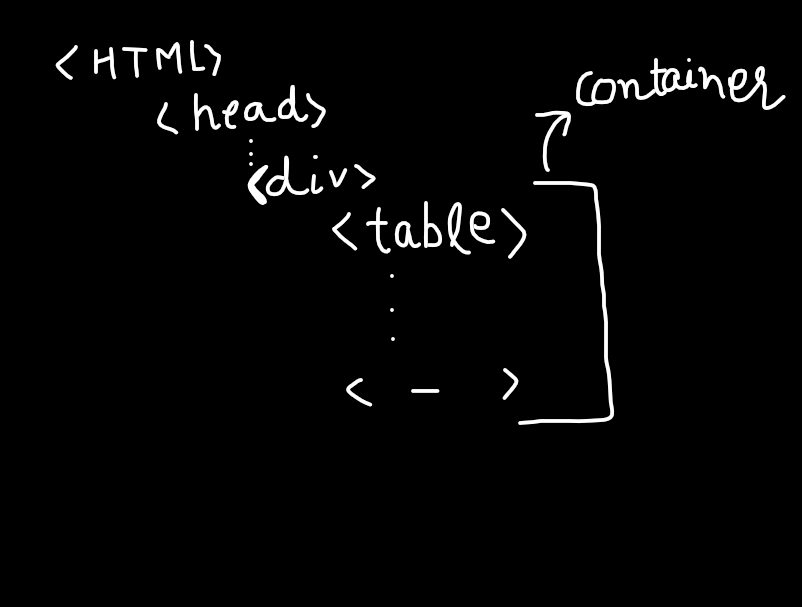

- __To get this table__, since most of the HTML containers have associated a __class__ or a particular __id__ or both,
hence, we can filter out the table that is needed by mentioning the table's class/id.
- To know the class/id of that table, __inspect__ that web page and after selecting __select an element in the page to inspect it__ hover over the table, this will highlight the class of that table in the element section. 

In [37]:
# For now the table is of class "wikitable sortable"
# Now we'll find out all the tables which have class "wikitable sortable"

tables = bleach_soup.findAll('table',{'class' : 'wikitable sortable'})
# Takes in optional arguments such as dictionary to filter based on class, id or something else

# It is also possible for a container to have multiple classes
print(len(tables)) # Knowing the total number of tables that have been received

1


In [38]:
bleach_table = tables[0] # Indexing to access the table that we want
print(bleach_table) # We have extracted the HTML that corresponds to that table 

<table class="wikitable sortable">
<tbody><tr>
<th>Season and name</th>
<th>Episodes</th>
<th>Anime original
</th></tr>
<tr>
<td><a href="/wiki/Bleach_(season_1)" title="Bleach (season 1)">Season 1: The Substitute (2004–2005)</a></td>
<td>20</td>
<td>No
</td></tr>
<tr>
<td><a href="/wiki/Bleach_(season_2)" title="Bleach (season 2)">Season 2: The Entry (2005)</a></td>
<td>21</td>
<td>No
</td></tr>
<tr>
<td><a href="/wiki/Bleach_(season_3)" title="Bleach (season 3)">Season 3: Soul Society: The Rescue (2005)</a></td>
<td>22</td>
<td>No
</td></tr>
<tr>
<td><a href="/wiki/Bleach_(season_4)" title="Bleach (season 4)">Season 4: The Bount (2006)</a></td>
<td>28</td>
<td>Yes
</td></tr>
<tr>
<td><a href="/wiki/Bleach_(season_5)" title="Bleach (season 5)">Season 5: The Assault (2006–2007)</a></td>
<td>18</td>
<td>Yes
</td></tr>
<tr>
<td><a href="/wiki/Bleach_(season_6)" title="Bleach (season 6)">Season 6: The Arrancar (2007)</a></td>
<td>22</td>
<td>No
</td></tr>
<tr>
<td><a href="/wiki/Bleach_(s

### Extracting Useful Information
- Remove undesired tags
- Extract table header & data

As we inspect the web page we notice that:
- Headers of the table are enclosed within __th__ tag.
- Rows are enclosed within the __tr__ tag.

In [39]:
headers = bleach_table.findAll('th')

A list of headers has been received, we can access all the headers using indices.

In [48]:
print(headers[0]) # But since we are expecting only the name

# We can get the text by:
aux = headers[0].text
print(aux)

<th>Season and name</th>
Season and name


For strings having a '\n' char at the end of the text, we can slice the string 
<br> For instance: 

<br> text = 'astral\n' and to get rid of '\n'
<br> we can do 

<br> text[:-1], this will return 'astral' 
<br> because the last index is exclusive

In [68]:
column_titles = [cur.text.strip('\n') for cur in headers] # Stripping of '\n' if any
print(column_titles)

['Season and name', 'Episodes', 'Anime original']


In [132]:
rows = bleach_table.findAll('tr')

After obtaining all the rows of the desired table, since we've already obtained column titles
<br> therefore, we slice off the first row.

#### WAY 1

In [133]:
rows_1 = rows[1:]

In [134]:
all_rows_1 = []
for cur_row in rows_1:
    all_rows_1.append(cur_row.text)

In [135]:
print(all_rows_1) # \n hasn't been removed

['\nSeason 1: The Substitute (2004–2005)\n20\nNo\n', '\nSeason 2: The Entry (2005)\n21\nNo\n', '\nSeason 3: Soul Society: The Rescue (2005)\n22\nNo\n', '\nSeason 4: The Bount (2006)\n28\nYes\n', '\nSeason 5: The Assault (2006–2007)\n18\nYes\n', '\nSeason 6: The Arrancar (2007)\n22\nNo\n', '\nSeason 7: The Arrancar Part 2: The Hueco Mundo Sneak Entry (2007)\n20\nNo\n', '\nSeason 8: The Arrancar Part 3: The Fierce Fight (2007–2008)\n16\nNo\n', '\nSeason 9: The New Captain Shūsuke Amagai (2008)\n22\nYes\n', '\nSeason 10: The Arrancar Part 4: Arrancar vs Soul Reaper (2008–2009)\n16\nNo\n', '\nSeason 11: The Past (2009)\n7\nNo\n', '\nSeason 12: The Arrancar Part 5: Battle in Karakura (2009)\n17\nNo\n', '\nSeason 13: Zanpakutō: The Alternate Tale (2009–2010)\n36\nYes\n', '\nSeason 14: The Arrancar Part 6: Fall of the Arrancar (2010–2011)\n51\nNo\n', '\nSeason 15: Gotei 13 Invading Army (2011)\n26\nYes\n', '\nSeason 16: The Lost Agent (2011–2012)\n24\nNo\n']


#### WAY 2

Since, after getting all __tr__ s the text packed in __td__ s, 
<br> we can fetch all __td__ s.

In [136]:
rows_2 = rows[1:]

In [142]:
all_rows_2 = []
for cur_row in rows_2: 
    helper = cur_row.findAll('td') # Holds table data, we get all tds in helper
    small_ans = [] # A list for storing data of all columns for a row
    for cur_td in helper: 
        small_ans.append(cur_td.text.strip('\n')) # extracting text as well as stripping off \n
    all_rows_2.append(small_ans)

In [143]:
print(all_rows_2)

[['Season 1: The Substitute (2004–2005)', '20', 'No'], ['Season 2: The Entry (2005)', '21', 'No'], ['Season 3: Soul Society: The Rescue (2005)', '22', 'No'], ['Season 4: The Bount (2006)', '28', 'Yes'], ['Season 5: The Assault (2006–2007)', '18', 'Yes'], ['Season 6: The Arrancar (2007)', '22', 'No'], ['Season 7: The Arrancar Part 2: The Hueco Mundo Sneak Entry (2007)', '20', 'No'], ['Season 8: The Arrancar Part 3: The Fierce Fight (2007–2008)', '16', 'No'], ['Season 9: The New Captain Shūsuke Amagai (2008)', '22', 'Yes'], ['Season 10: The Arrancar Part 4: Arrancar vs Soul Reaper (2008–2009)', '16', 'No'], ['Season 11: The Past (2009)', '7', 'No'], ['Season 12: The Arrancar Part 5: Battle in Karakura (2009)', '17', 'No'], ['Season 13: Zanpakutō: The Alternate Tale (2009–2010)', '36', 'Yes'], ['Season 14: The Arrancar Part 6: Fall of the Arrancar (2010–2011)', '51', 'No'], ['Season 15: Gotei 13 Invading Army (2011)', '26', 'Yes'], ['Season 16: The Lost Agent (2011–2012)', '24', 'No']]


### Writing & Reading CSV Files
- csv stands for comma separated file

In [144]:
# creating file
filename = 'bleach_season_list.csv'

In [146]:
with open(filename,'w',encoding = 'utf-8') as f:
    # Write the header
    header_string = ','.join(column_titles) # since we are writing in a comma separated file
    header_string += '\n'
    f.write(header_string)
    
    # Write rows
    for row in all_rows_2:
        row_string = ','.join(row)
        row_string += '\n'
        f.write(row_string)    

In [148]:
with open(filename,'r',encoding = 'utf-8') as f:
    f.read()

Season and name,Episodes,Anime original
Season 1: The Substitute (2004–2005),20,No
Season 2: The Entry (2005),21,No
Season 3: Soul Society: The Rescue (2005),22,No
Season 4: The Bount (2006),28,Yes
Season 5: The Assault (2006–2007),18,Yes
Season 6: The Arrancar (2007),22,No
Season 7: The Arrancar Part 2: The Hueco Mundo Sneak Entry (2007),20,No
Season 8: The Arrancar Part 3: The Fierce Fight (2007–2008),16,No
Season 9: The New Captain Shūsuke Amagai (2008),22,Yes
Season 10: The Arrancar Part 4: Arrancar vs Soul Reaper (2008–2009),16,No
Season 11: The Past (2009),7,No
Season 12: The Arrancar Part 5: Battle in Karakura (2009),17,No
Season 13: Zanpakutō: The Alternate Tale (2009–2010),36,Yes
Season 14: The Arrancar Part 6: Fall of the Arrancar (2010–2011),51,No
Season 15: Gotei 13 Invading Army (2011),26,Yes
Season 16: The Lost Agent (2011–2012),24,No



Now for __reading csv__ a popular lib is pandas

In [151]:
import pandas as pd

In [152]:
data_frame = pd.read_csv('bleach_season_list.csv')

<font color = yellow> A DataFrame is the most common Structured API and simply represents a table of data with rows and columns </font>  

In [156]:
data_frame.head(n=16) # printing n rows

,Season and name,Episodes,Anime original
0,Season 1: The Substitute (2004–2005),20,No
1,Season 2: The Entry (2005),21,No
2,Season 3: Soul Society: The Rescue (2005),22,No
3,Season 4: The Bount (2006),28,Yes
4,Season 5: The Assault (2006–2007),18,Yes
5,Season 6: The Arrancar (2007),22,No
6,Season 7: The Arrancar Part 2: The Hueco Mundo...,20,No
7,Season 8: The Arrancar Part 3: The Fierce Figh...,16,No
8,Season 9: The New Captain Shūsuke Amagai (2008),22,Yes
9,Season 10: The Arrancar Part 4: Arrancar vs So...,16,No


In [159]:
print(data_frame.iloc[3]) # Accessing a particular row

Season and name    Season 4: The Bount (2006)
Episodes                                   28
Anime original                            Yes
Name: 3, dtype: object


In [163]:
print(data_frame.iloc[3][0]) # Accessing a particular column for a particular row

Season 4: The Bount (2006)
